In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
import cv2
from tqdm import tqdm,trange,tqdm_notebook
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import random

import matplotlib.pyplot as plt

import pickle



## Important Pathes

In [2]:
BASE_PATH = "/kaggle/input/plant-pathology-2020-fgvc7"
IMAGES_PATH = f"{BASE_PATH}/images/"
TRAIN_PATH = f"{BASE_PATH}/trian.csv"
TEST_PATH = f"{BASE_PATH}/test.csv"
SUBMISSION_PATH = f"{BASE_PATH}/sample_submission.csv"

datasets_folder = os.path.join("/kaggle/input/plant-pathology-2020-fgvc7")



## Loading Training dataset

In [3]:
# load train dataset
train_df = pd.read_csv(os.path.join(datasets_folder, "train.csv"))
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


## Testing the images path

In [5]:
image_dataset = pathlib.Path(os.path.join(datasets_folder, "images"))
print(image_dataset)
list_images = list(image_dataset.glob('*.*'))
print(list_images[0])

/kaggle/input/plant-pathology-2020-fgvc7/images
/kaggle/input/plant-pathology-2020-fgvc7/images/Test_1743.jpg


## Take a look on your images

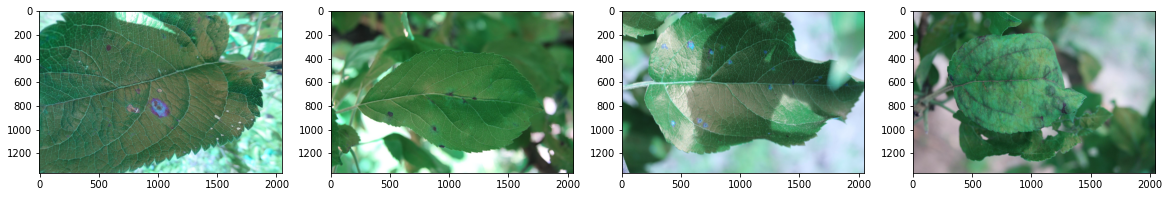

In [6]:
plt.figure(figsize = (20, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    img = cv2.imread(str(list_images[i]))
    plt.imshow(img)
plt.show()

## Splitting the columns

In [7]:
images_id_csv = train_df['image_id']
healthy_csv = train_df['healthy']
multiple_diseases_csv = train_df['multiple_diseases']
rust_csv = train_df['rust']
scab_csv = train_df['scab']


## Reading images and labels

In [8]:
image_size = 100
images = []
labels = []

for index, image_name in tqdm(enumerate(images_id_csv), desc="creating images and labels"):
    img = cv2.imread(os.path.join(datasets_folder, 'images', f'{image_name}.jpg'))
    img = cv2.resize(img, (image_size, image_size))
    img = np.array(img).flatten()
    img = img / 255.0
    

    labels.append([healthy_csv[index], multiple_diseases_csv[index], rust_csv[index], scab_csv[index]])
    images.append(img)
    

creating images and labels: 1821it [01:16, 23.68it/s]


In [10]:
len(images)

1821

In [11]:
print(len(images), len(labels))

1821 1821


## Split for training and testing

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.2)
ytrain = np.array(ytrain).argmax(axis=1)
ytest = np.array(ytest).argmax(axis=1)
print(ytrain.shape, ytest.shape)
# print(xtrain, xtrain.shape)
# print(ytest)

(1456,) (365,)


In [33]:
c= 10
gama = 0.001

# with rbf without any parameters


In [21]:
model = SVC(cache_size=1000, random_state=0, decision_function_shape='ovo')
model.fit(xtrain, ytrain)
predecitons = model.predict(xtest)
acc = model.score(xtest, ytest)
print(f"accuracy = {acc}")


accuracy = 0.4794520547945205


## Saving the RBF model

In [22]:
rbfFile = open("rbfModel.pcl", "wb")
pickle.dump(model, rbfFile)
rbfFile.close()
print("rbf model was saved successfully")

rbf model was saved successfully


# with linear without parameters

In [23]:
model = SVC(kernel="linear", cache_size=1000, random_state=0, decision_function_shape='ovo')
model.fit(xtrain, ytrain)
predecitons = model.predict(xtest)
acc = model.score(xtest, ytest)
print(f"accuracy = {acc}")

accuracy = 0.39452054794520547


## Saving Linear Model

In [24]:
linearFile = open("linearModel.pcl", "wb")
pickle.dump(model, linearFile)
rbfFile.close()
print("Linear model was saved successfully")

Linear model was saved successfully


# with poly without parameters


In [25]:
model = SVC(kernel="poly", cache_size=1000, random_state=0, decision_function_shape='ovo')
model.fit(xtrain, ytrain)
predecitons = model.predict(xtest)
acc = model.score(xtest, ytest)
print(f"accuracy = {acc}")

accuracy = 0.4410958904109589


## Saving Poly Model

In [26]:
polyFile = open("polyModel.pcl", "wb")
pickle.dump(model, polyFile)
rbfFile.close()
print("Poly model was saved successfully")

Poly model was saved successfully


## Loading RBF Model as it has the best accuracy

In [32]:


model = pickle.load(open("rbfModel.pcl", "rb"))
predecitons = model.predict(xtest)
acc = model.score(xtest, ytest)
print(f"accuracy = {acc}")

accuracy = 0.4794520547945205
